In [1]:
import pandas as pd
import numpy as np
import json
import sys
import requests 
import matplotlib.pyplot as plt
%matplotlib inline

## FHV 

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www1.nyc.gov/assets/tlc/images/content/pages/about/taxi_zone_map_brooklyn.jpg", width=500, height=500)

Zone Code for Rezoning Area in Redhook: 195

In [2]:
taxi_zone_list = [195]

#### Read FHV data within zone 195

In [3]:
def readfiles(filename):
    fhv_df = pd.read_csv(filename)
    taxi_zone_list = [195]
    fhv_df = fhv_df[(fhv_df['PUlocationID'].isin(taxi_zone_list)) | (fhv_df['DOlocationID'].isin(taxi_zone_list))]
    fhv_df['Pickup_DateTime'] = pd.to_datetime(fhv_df['Pickup_DateTime'], errors = 'coerce')
    fhv_df['DropOff_datetime'] = pd.to_datetime(fhv_df['DropOff_datetime'], errors = 'coerce')
    return(fhv_df)

In [4]:
fhv201801 = readfiles('fhv_tripdata_2018-01.csv')
fhv201802 = readfiles('fhv_tripdata_2018-02.csv')
fhv201803 = readfiles('fhv_tripdata_2018-03.csv')
fhv201804 = readfiles('fhv_tripdata_2018-04.csv')
fhv201805 = readfiles('fhv_tripdata_2018-05.csv')
fhv201806 = readfiles('fhv_tripdata_2018-06.csv')
fhv201807 = readfiles('fhv_tripdata_2018-07.csv')
fhv201808 = readfiles('fhv_tripdata_2018-08.csv')
fhv201809 = readfiles('fhv_tripdata_2018-09.csv')
fhv201810 = readfiles('fhv_tripdata_2018-10.csv')
fhv201811 = readfiles('fhv_tripdata_2018-11.csv')
fhv201812 = readfiles('fhv_tripdata_2018-12.csv')

#### Combine FHV data from 2018-01 to 2018-12

In [5]:
fhv_total = pd.concat([fhv201801,fhv201802,fhv201803,fhv201804,fhv201805,fhv201806,fhv201807,fhv201808,fhv201809,
                     fhv201810,fhv201811,fhv201812])

In [6]:
fhv_total = fhv_total[['Pickup_DateTime','DropOff_datetime','PUlocationID','DOlocationID']]

In [7]:
fhv_total.shape

(910049, 4)

In [8]:
fhv_total.head()

Pickup_DateTime    DropOff_datetime  PUlocationID  DOlocationID
742  2018-01-03 16:21:51 2018-01-03 16:35:55          66.0         195.0
955  2018-01-03 16:50:01 2018-01-03 17:15:15         195.0         181.0
1904 2018-01-30 21:56:47 2018-01-30 22:23:11          89.0         195.0
3405 2018-01-03 16:42:03 2018-01-03 17:10:03         195.0          67.0
3766 2018-01-03 16:01:56 2018-01-03 16:16:49         195.0         227.0

#### Create Time Variables

In [9]:
fhv_total['month'] = fhv_total.Pickup_DateTime.dt.month
fhv_total['puDate'] = fhv_total.Pickup_DateTime.dt.date
fhv_total['puHour'] = fhv_total.Pickup_DateTime.dt.hour
fhv_total['puDay'] = fhv_total.Pickup_DateTime.dt.weekday
fhv_total['doDate'] = fhv_total.DropOff_datetime.dt.date
fhv_total['doHour'] = fhv_total.DropOff_datetime.dt.hour
fhv_total['doDay'] = fhv_total.DropOff_datetime.dt.weekday

In [10]:
fhv_total.head()

Pickup_DateTime    DropOff_datetime  PUlocationID  DOlocationID  \
742  2018-01-03 16:21:51 2018-01-03 16:35:55          66.0         195.0   
955  2018-01-03 16:50:01 2018-01-03 17:15:15         195.0         181.0   
1904 2018-01-30 21:56:47 2018-01-30 22:23:11          89.0         195.0   
3405 2018-01-03 16:42:03 2018-01-03 17:10:03         195.0          67.0   
3766 2018-01-03 16:01:56 2018-01-03 16:16:49         195.0         227.0   

      month      puDate  puHour  puDay      doDate  doHour  doDay  
742       1  2018-01-03      16      2  2018-01-03      16      2  
955       1  2018-01-03      16      2  2018-01-03      17      2  
1904      1  2018-01-30      21      1  2018-01-30      22      1  
3405      1  2018-01-03      16      2  2018-01-03      17      2  
3766      1  2018-01-03      16      2  2018-01-03      16      2

#### Output formatted FHV files

In [11]:
#fhv_total.to_csv('fhv_total_201801_12.csv')

#### Analysis for FHV

In [118]:
#pickups by date
fhv_total[fhv_total['PUlocationID'].isin(taxi_zone_list)].groupby('puDate').count()[['PUlocationID']].rename(columns={'PUlocationID':'Pickups'}).describe()
                                                                        

Pickups
count   365.000000
mean   3801.336986
std     619.606609
min    2096.000000
25%    3390.000000
50%    3678.000000
75%    4192.000000
max    6114.000000

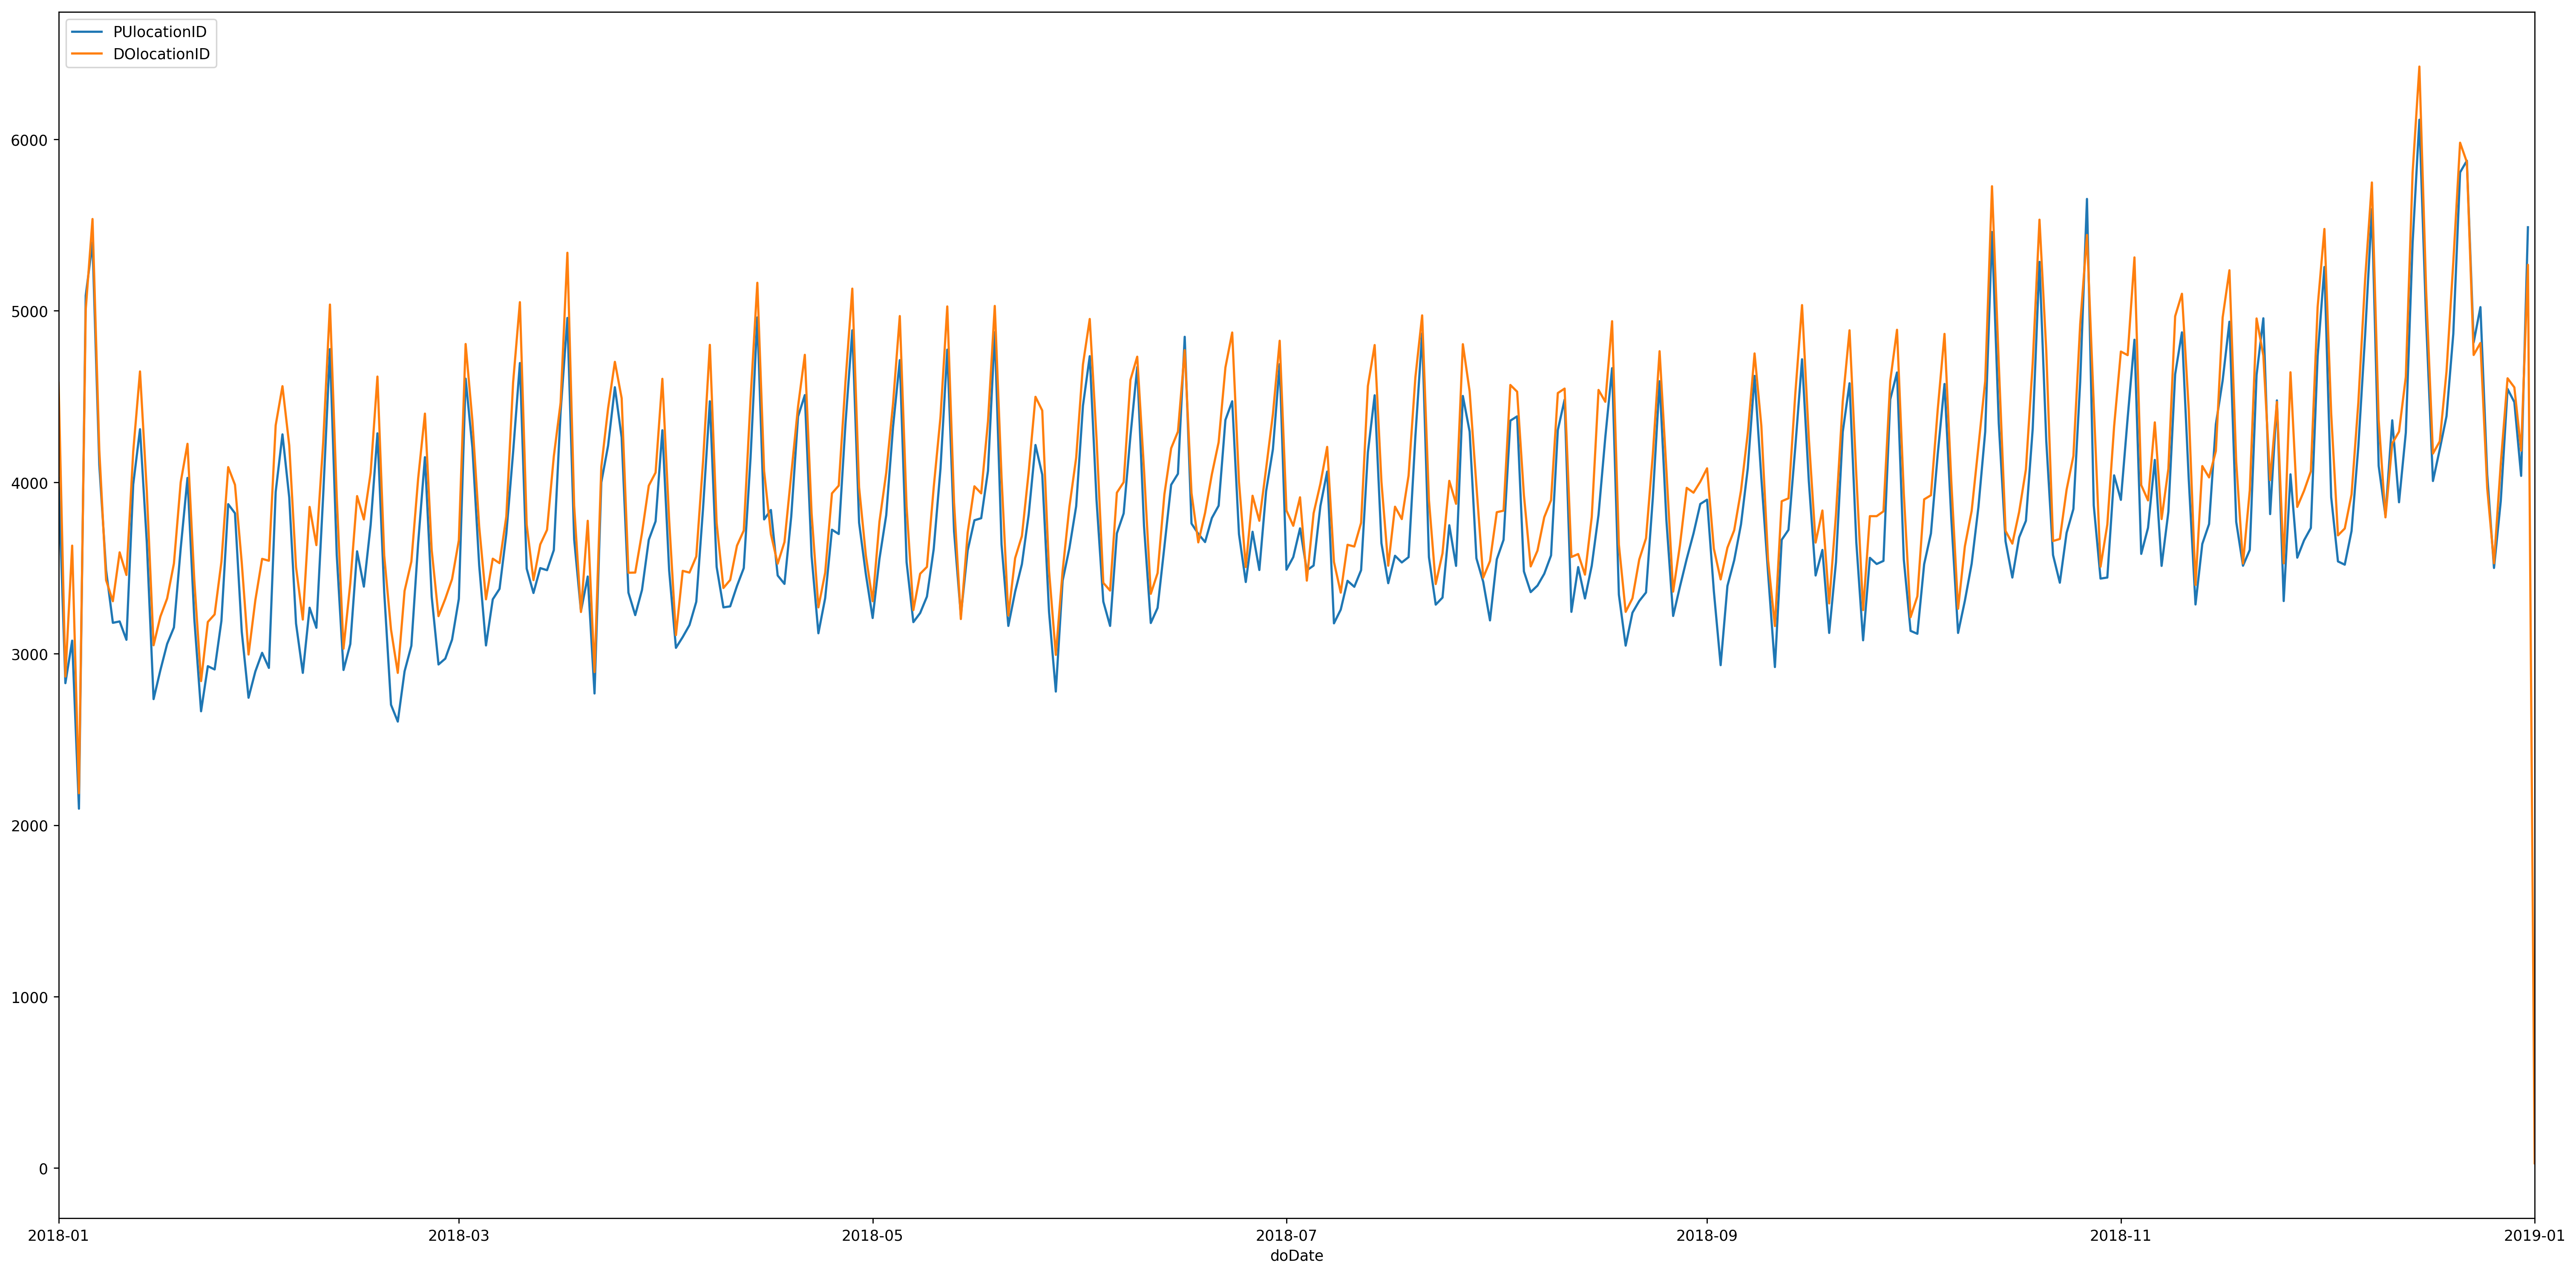

In [119]:
fhv_pickup_date = fhv_total[fhv_total['PUlocationID'].isin(taxi_zone_list)].groupby('puDate').count()[['PUlocationID']]
fhv_dropoff_date = fhv_total[fhv_total['DOlocationID'].isin(taxi_zone_list)].groupby('doDate').count()[['DOlocationID']]
f, ax = plt.subplots(figsize=(30, 15),dpi=250)
fhv_pickup_date.plot(ax=ax)
fhv_dropoff_date.plot(ax=ax)

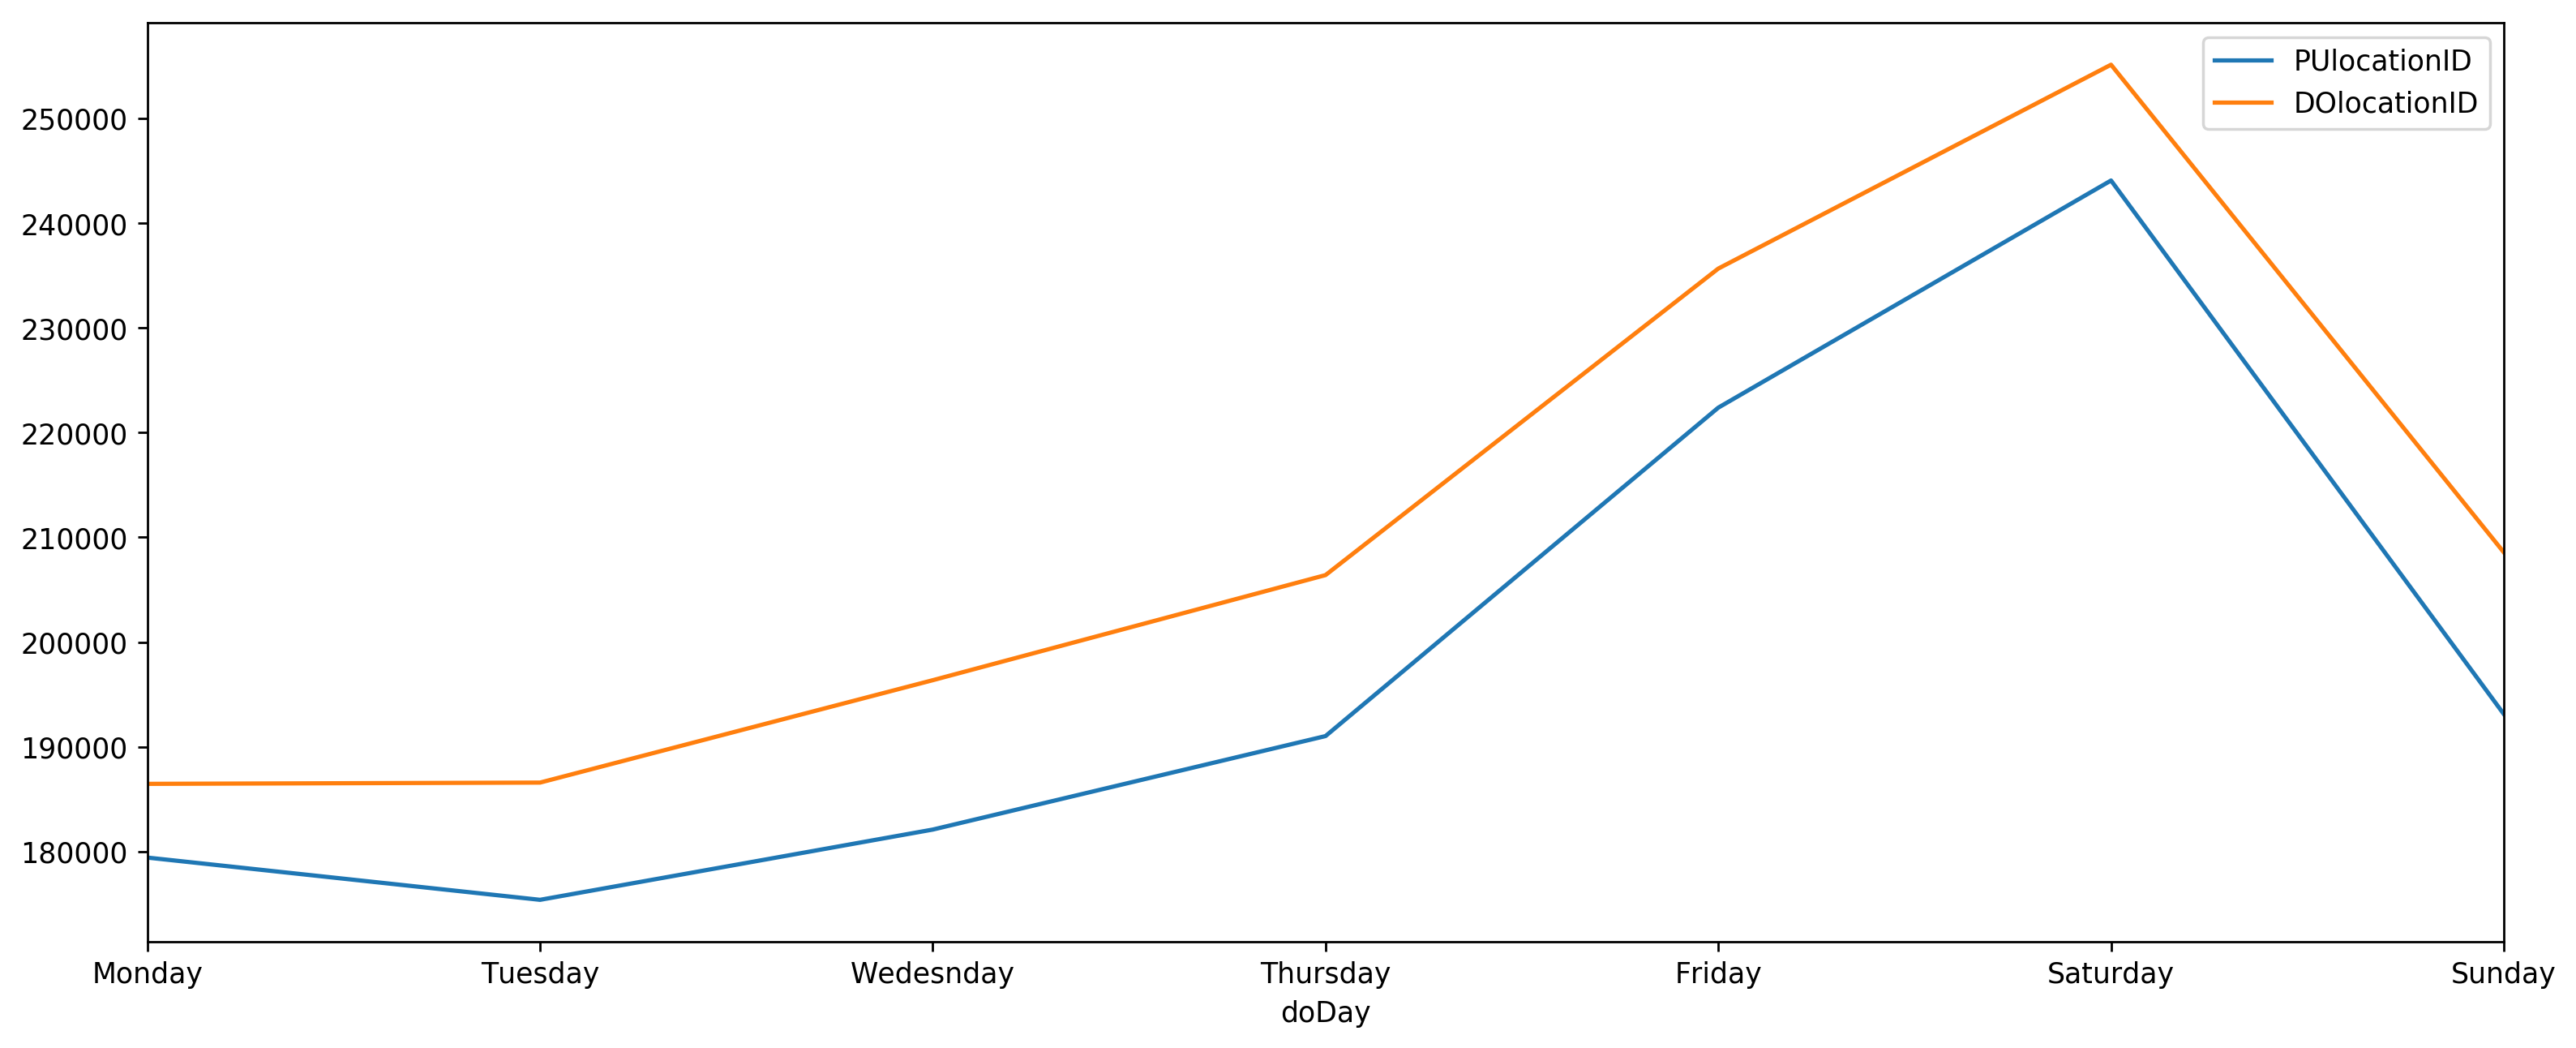

In [196]:
label = ['Monday','Tuesday','Wedesnday','Thursday','Friday','Saturday','Sunday']
fhv_pickup_day = fhv_total[fhv_total['PUlocationID'].isin(taxi_zone_list)].groupby('puDay').count()[['PUlocationID']]
fhv_dropoff_day = fhv_total[fhv_total['DOlocationID'].isin(taxi_zone_list)].groupby('doDay').count()[['DOlocationID']]
f, ax = plt.subplots(figsize=(15, 6),dpi=250)
fhv_pickup_day.plot(ax=ax)
fhv_dropoff_day.plot(ax=ax)
plt.xticks(np.arange(7), ('Monday','Tuesday','Wedesnday','Thursday','Friday','Saturday','Sunday'))
plt.show()

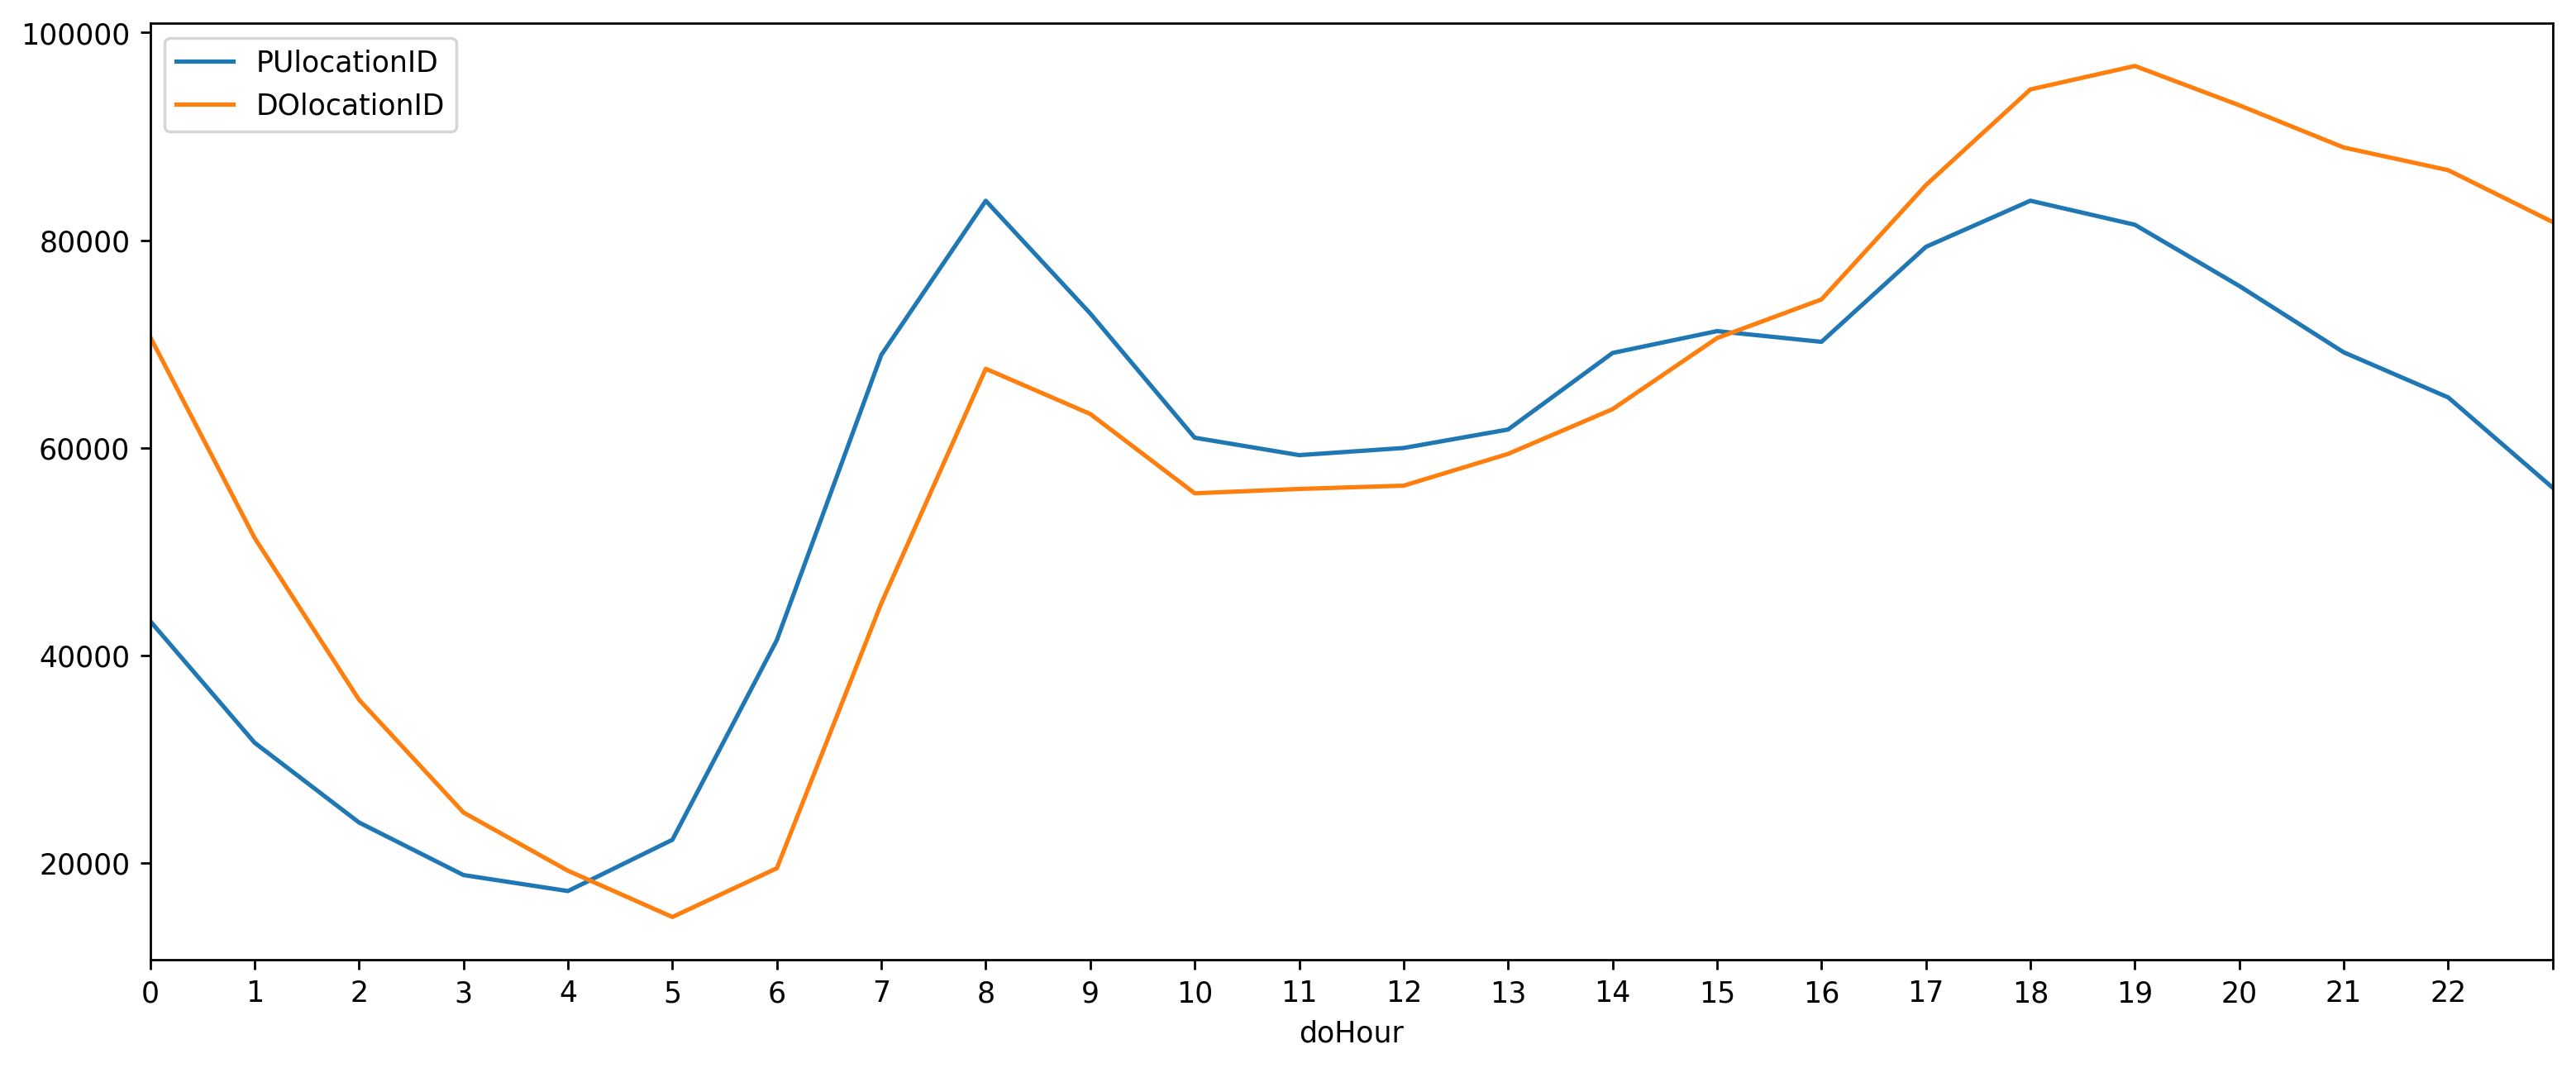

In [197]:
fhv_pickup_hour = fhv_total[fhv_total['PUlocationID'].isin(taxi_zone_list)].groupby('puHour').count()[['PUlocationID']]
fhv_dropoff_hour = fhv_total[fhv_total['DOlocationID'].isin(taxi_zone_list)].groupby('doHour').count()[['DOlocationID']]
f, ax = plt.subplots(figsize=(15, 6),dpi=250)
fhv_pickup_hour.plot(ax=ax)
fhv_dropoff_hour.plot(ax=ax)
plt.xticks(np.arange(24), (range(0,23)))
plt.show()

## Green Taxi

#### Read Green Taxi data within zones 195

In [24]:
def greenreadfiles(filename):
    green_df = pd.read_csv(filename)
    taxi_zone_list = [195]
    green_df = green_df[(green_df['PULocationID'].isin(taxi_zone_list)) | (green_df['DOLocationID'].isin(taxi_zone_list))]
    green_df['lpep_pickup_datetime'] = pd.to_datetime(green_df['lpep_pickup_datetime'], errors = 'coerce')
    green_df['lpep_dropoff_datetime'] = pd.to_datetime(green_df['lpep_dropoff_datetime'], errors = 'coerce')
    return(green_df)

In [25]:
green201801 = greenreadfiles('green_tripdata_2018-01.csv')
green201802 = greenreadfiles('green_tripdata_2018-02.csv')
green201803 = greenreadfiles('green_tripdata_2018-03.csv')
green201804 = greenreadfiles('green_tripdata_2018-04.csv')
green201805 = greenreadfiles('green_tripdata_2018-05.csv')
green201806 = greenreadfiles('green_tripdata_2018-06.csv')
green201807 = greenreadfiles('green_tripdata_2018-07.csv')
green201808 = greenreadfiles('green_tripdata_2018-08.csv')
green201809 = greenreadfiles('green_tripdata_2018-09.csv')
green201810 = greenreadfiles('green_tripdata_2018-10.csv')
green201811 = greenreadfiles('green_tripdata_2018-11.csv')
green201812 = greenreadfiles('green_tripdata_2018-12.csv')

#### Combine Green Taxi data from 2018-01 to 2018-12

In [26]:
green_total = pd.concat([green201801,green201802,green201803,green201804,green201805,green201806,
                         green201807,green201808,green201809,green201810,green201811,green201812])

In [27]:
green_total.shape

(48739, 19)

In [28]:
green_total = green_total[['lpep_pickup_datetime','lpep_dropoff_datetime','PULocationID','DOLocationID']]

In [29]:
green_total.head()

lpep_pickup_datetime lpep_dropoff_datetime  PULocationID  DOLocationID
294   2018-01-01 00:40:17   2018-01-01 00:56:23           189           195
367   2018-01-01 00:35:20   2018-01-01 00:54:56            17           195
552   2018-01-01 00:59:24   2018-01-01 01:05:18           195            33
799   2018-01-01 00:57:20   2018-01-01 01:06:57            25           195
1028  2018-01-01 00:36:20   2018-01-01 01:02:45           195           262

#### Create Time Variables

In [30]:
green_total['month'] = green_total.lpep_pickup_datetime.dt.month
green_total['puDate'] = green_total.lpep_pickup_datetime.dt.date
green_total['puHour'] = green_total.lpep_pickup_datetime.dt.hour
green_total['puDay'] = green_total.lpep_pickup_datetime.dt.weekday
green_total['doDate'] = green_total.lpep_dropoff_datetime.dt.date
green_total['doHour'] = green_total.lpep_dropoff_datetime.dt.hour
green_total['doDay'] = green_total.lpep_dropoff_datetime.dt.weekday

In [31]:
green_total = green_total[green_total.lpep_dropoff_datetime.dt.year == 2018]

In [32]:
green_total.head()

lpep_pickup_datetime lpep_dropoff_datetime  PULocationID  DOLocationID  \
294   2018-01-01 00:40:17   2018-01-01 00:56:23           189           195   
367   2018-01-01 00:35:20   2018-01-01 00:54:56            17           195   
552   2018-01-01 00:59:24   2018-01-01 01:05:18           195            33   
799   2018-01-01 00:57:20   2018-01-01 01:06:57            25           195   
1028  2018-01-01 00:36:20   2018-01-01 01:02:45           195           262   

      month      puDate  puHour  puDay      doDate  doHour  doDay  
294       1  2018-01-01       0      0  2018-01-01       0      0  
367       1  2018-01-01       0      0  2018-01-01       0      0  
552       1  2018-01-01       0      0  2018-01-01       1      0  
799       1  2018-01-01       0      0  2018-01-01       1      0  
1028      1  2018-01-01       0      0  2018-01-01       1      0

#### Output Green Taxi data 

In [33]:
green_total.to_csv('green_total_201801_12.csv')

#### Analysis for Green Taxi

In [37]:
#pickups by date
green_total[green_total['PULocationID'].isin(taxi_zone_list)].groupby('puDate').count()[['PULocationID']].rename(columns={'PULocationID':'Pickups'}).describe()
                                                                        

Pickups
count  365.000000
mean    33.506849
std     28.053091
min      4.000000
25%     19.000000
50%     25.000000
75%     36.000000
max    165.000000

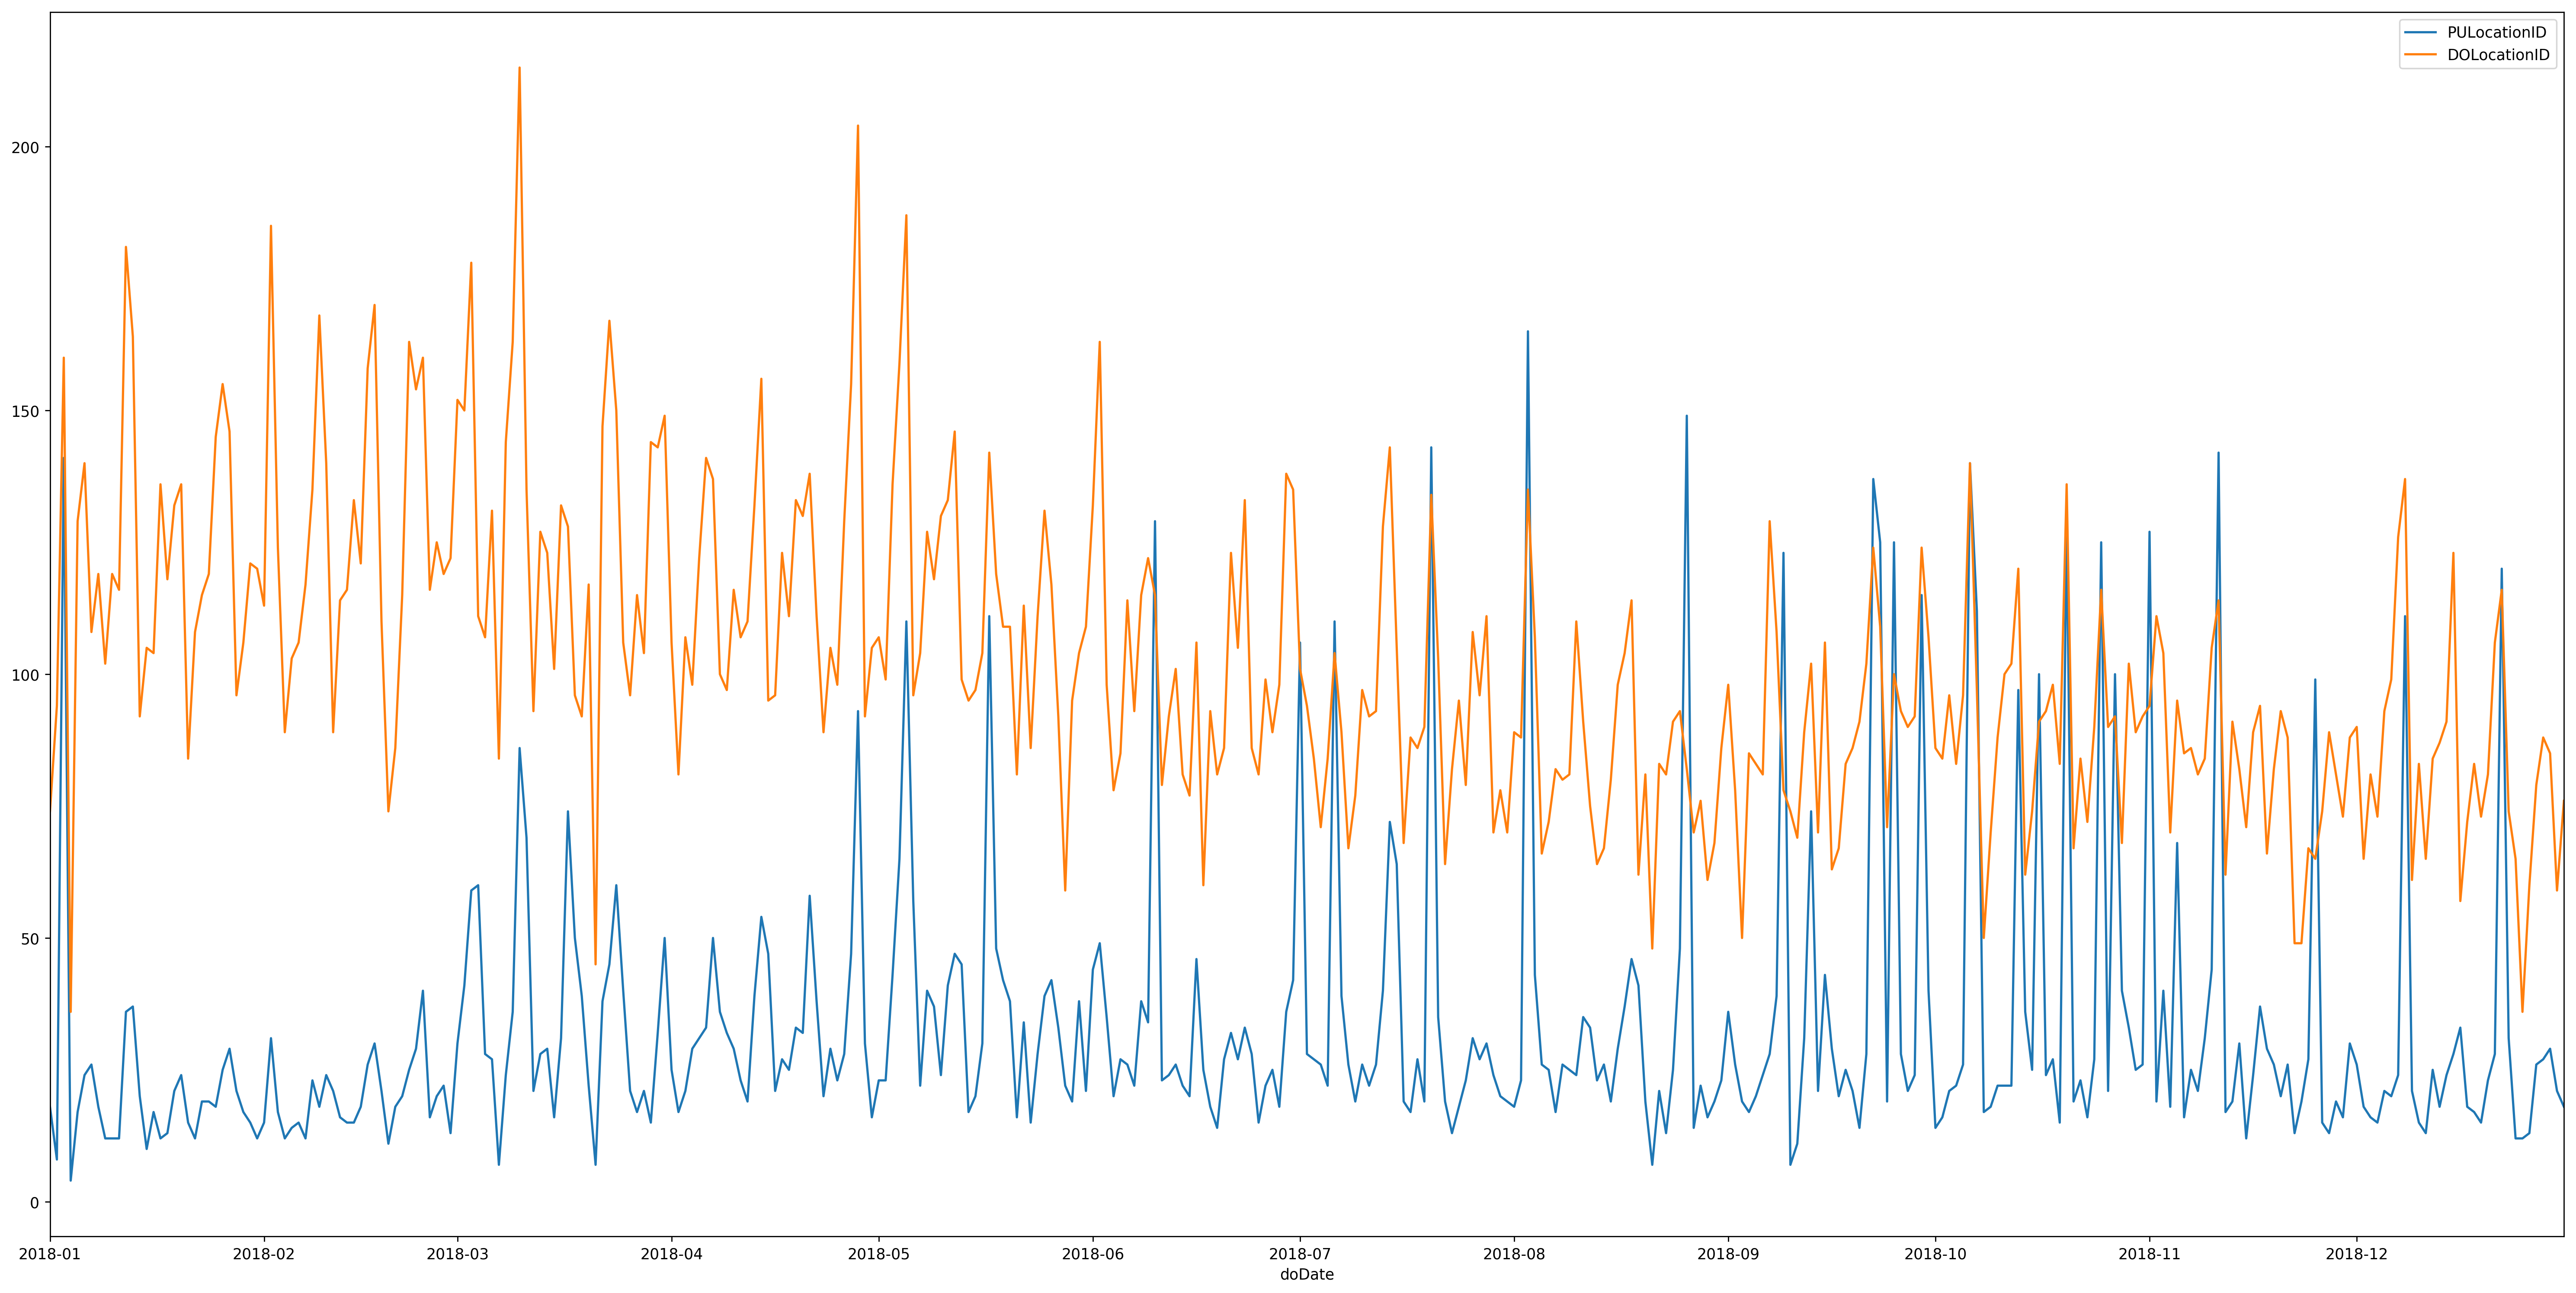

In [38]:
green_pickup_date = green_total[green_total['PULocationID'].isin(taxi_zone_list)].groupby('puDate').count()[['PULocationID']]
green_dropoff_date = green_total[green_total['DOLocationID'].isin(taxi_zone_list)].groupby('doDate').count()[['DOLocationID']]
f, ax = plt.subplots(figsize=(30, 15),dpi=250)
green_pickup_date.plot(ax=ax)
green_dropoff_date.plot(ax=ax)

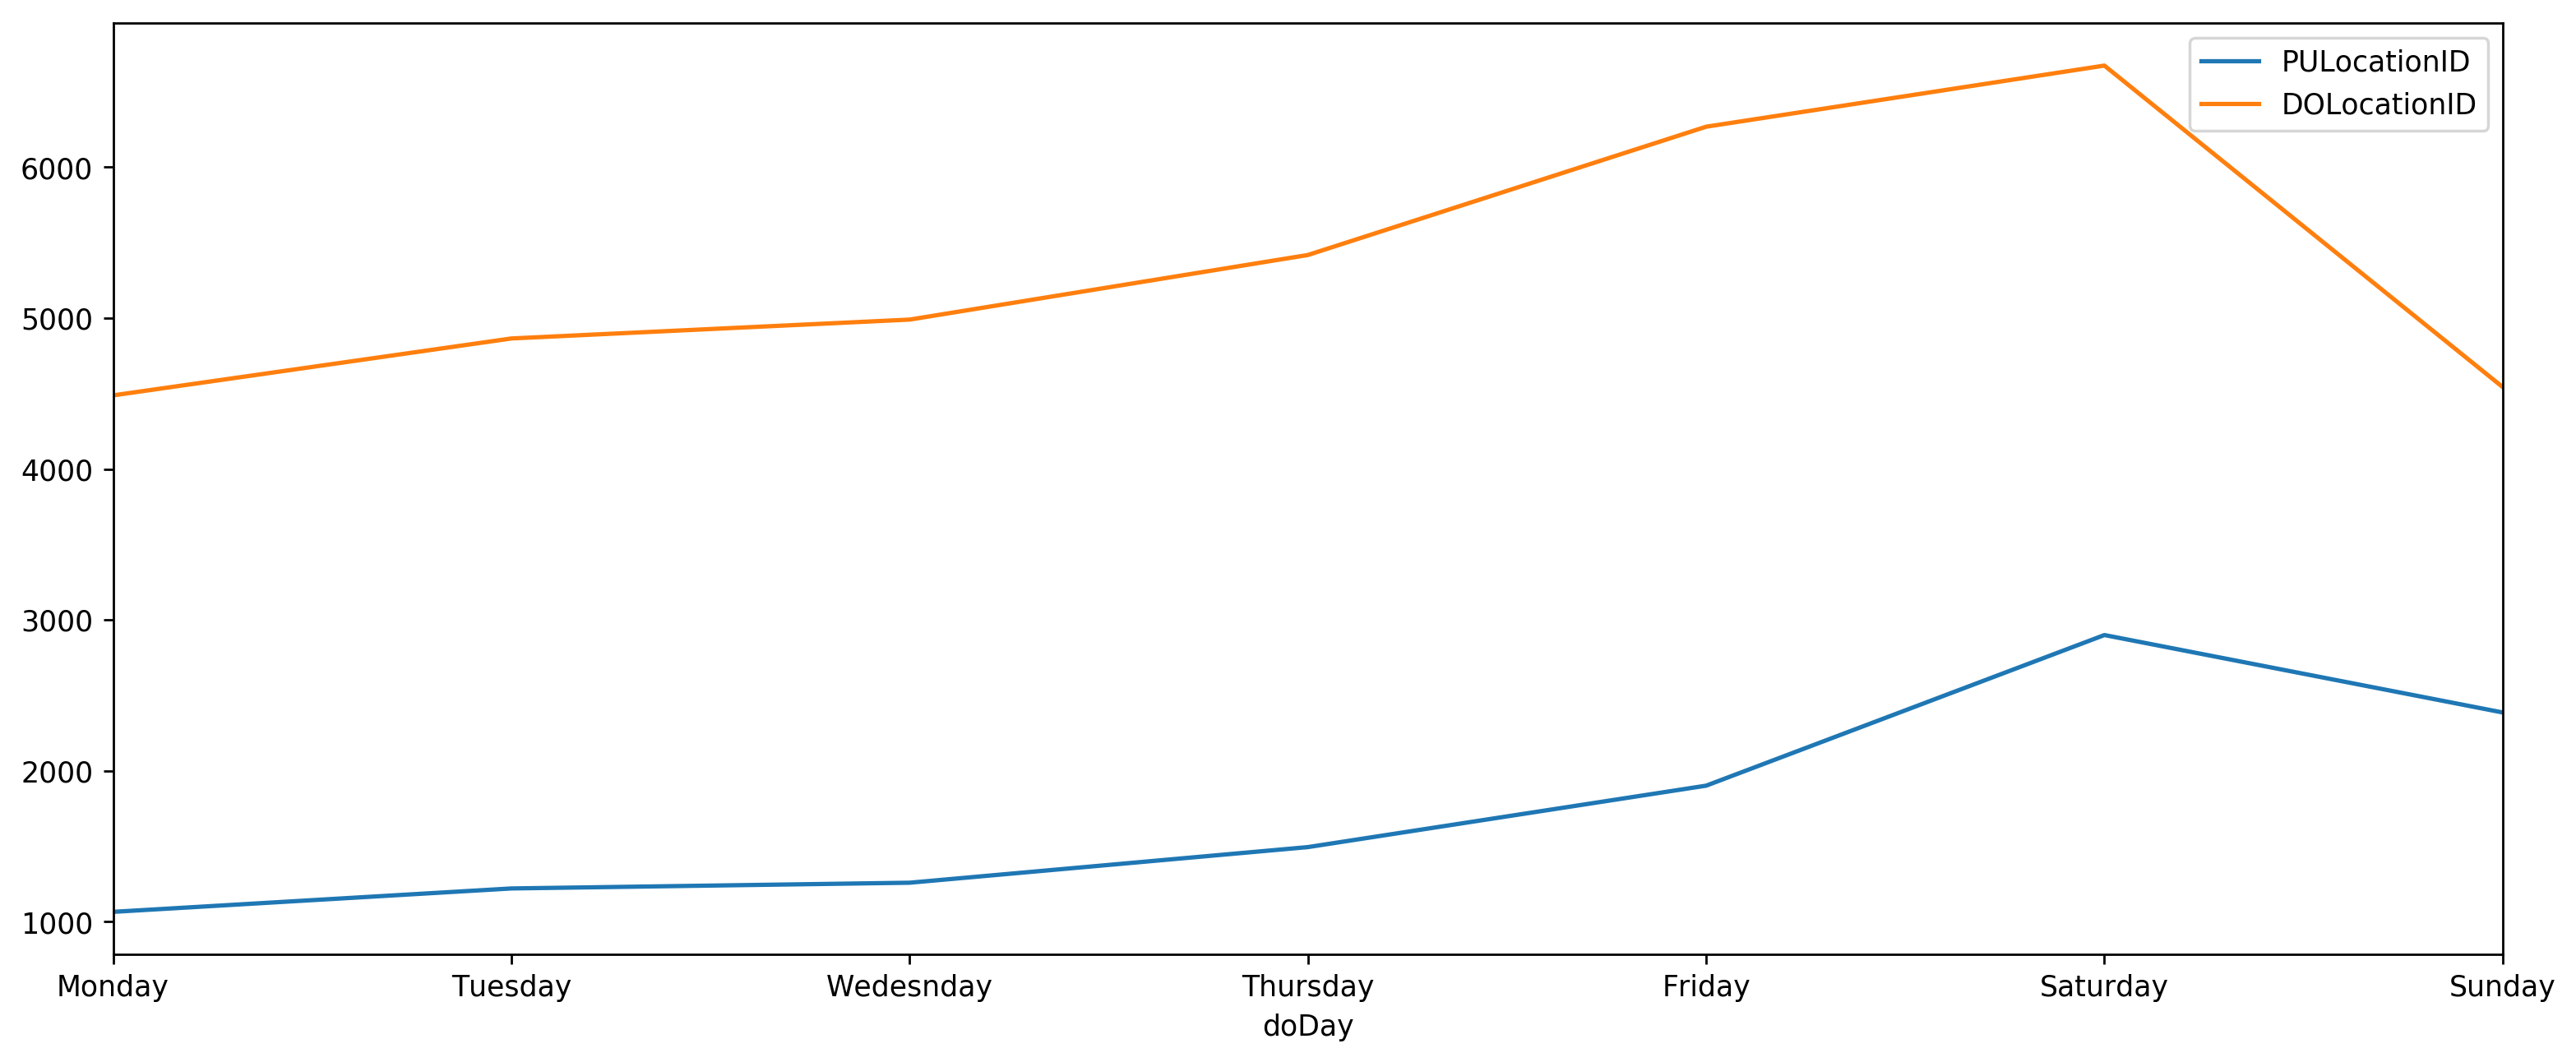

In [39]:
label = ['Monday','Tuesday','Wedesnday','Thursday','Friday','Saturday','Sunday']
green_pickup_day = green_total[green_total['PULocationID'].isin(taxi_zone_list)].groupby('puDay').count()[['PULocationID']]
green_dropoff_day = green_total[green_total['DOLocationID'].isin(taxi_zone_list)].groupby('doDay').count()[['DOLocationID']]
f, ax = plt.subplots(figsize=(15, 6),dpi=250)
green_pickup_day.plot(ax=ax)
green_dropoff_day.plot(ax=ax)
plt.xticks(np.arange(7), ('Monday','Tuesday','Wedesnday','Thursday','Friday','Saturday','Sunday'))
plt.show()

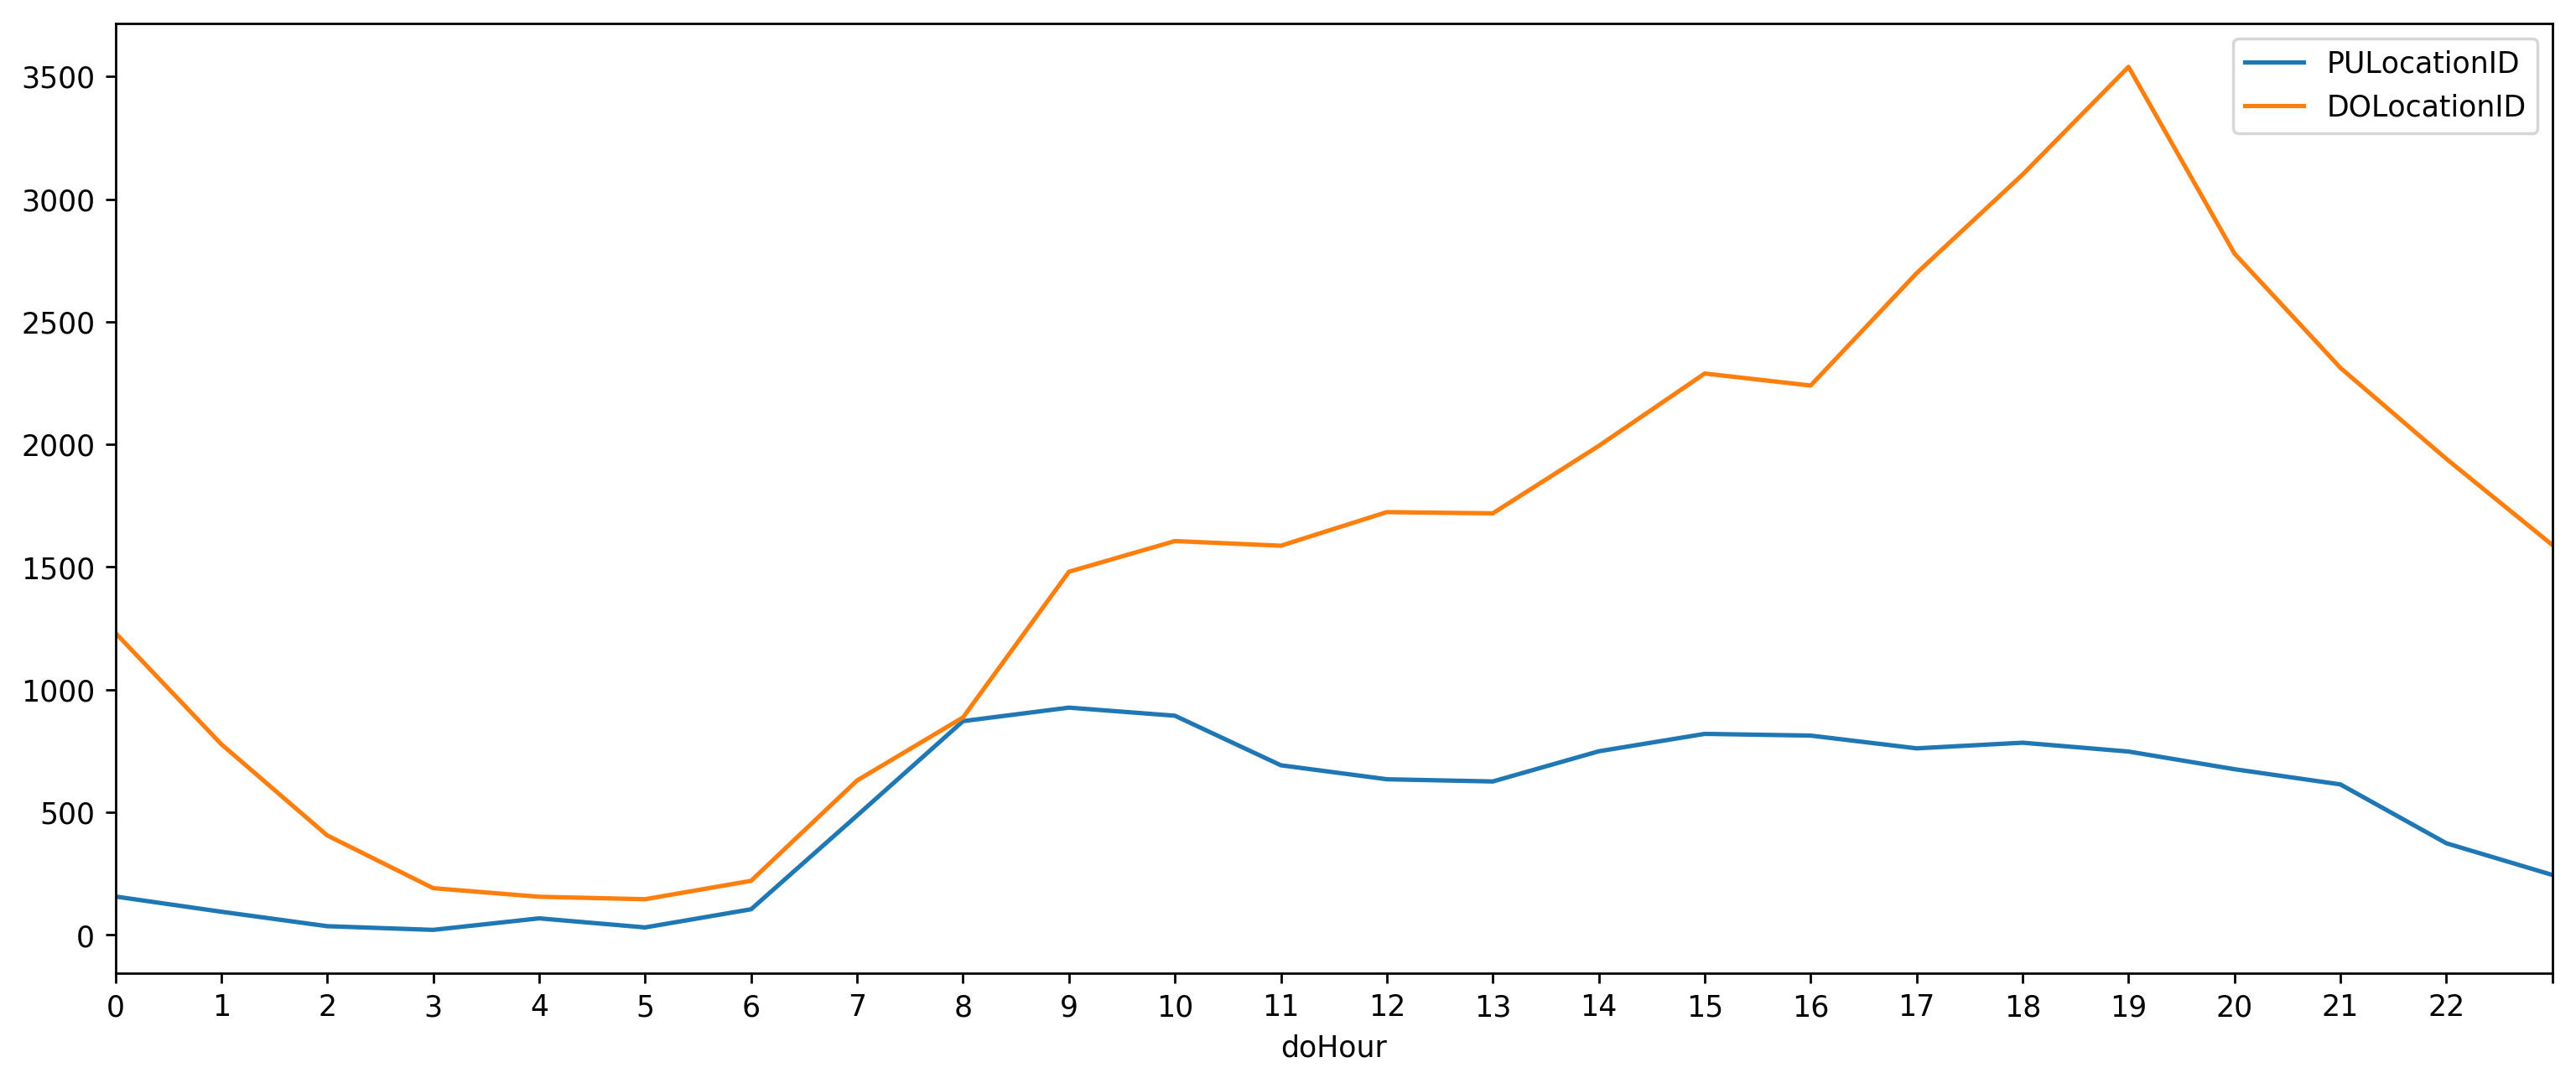

In [40]:
green_pickup_hour = green_total[green_total['PULocationID'].isin(taxi_zone_list)].groupby('puHour').count()[['PULocationID']]
green_dropoff_hour = green_total[green_total['DOLocationID'].isin(taxi_zone_list)].groupby('doHour').count()[['DOLocationID']]
f, ax = plt.subplots(figsize=(15, 6),dpi=250)
green_pickup_hour.plot(ax=ax)
green_dropoff_hour.plot(ax=ax)
plt.xticks(np.arange(24), (range(0,23)))
plt.show()

## Yellow Taxi

In [41]:
def yellowreadfiles(filename):
    yellow_df = pd.read_csv(filename)
    taxi_zone_list = [195]
    yellow_df = yellow_df[(yellow_df['PULocationID'].isin(taxi_zone_list)) | (yellow_df['DOLocationID'].isin(taxi_zone_list))]
    yellow_df['tpep_pickup_datetime'] = pd.to_datetime(yellow_df['tpep_pickup_datetime'], errors = 'coerce')
    yellow_df['tpep_dropoff_datetime'] = pd.to_datetime(yellow_df['tpep_dropoff_datetime'], errors = 'coerce')
    return(yellow_df)

In [42]:
yellow201801 = yellowreadfiles('yellow_tripdata_2018-01.csv')
yellow201802 = yellowreadfiles('yellow_tripdata_2018-02.csv')
yellow201803 = yellowreadfiles('yellow_tripdata_2018-03.csv')
yellow201804 = yellowreadfiles('yellow_tripdata_2018-04.csv')
yellow201805 = yellowreadfiles('yellow_tripdata_2018-05.csv')
yellow201806 = yellowreadfiles('yellow_tripdata_2018-06.csv')
yellow201807 = yellowreadfiles('yellow_tripdata_2018-07.csv')
yellow201808 = yellowreadfiles('yellow_tripdata_2018-08.csv')
yellow201809 = yellowreadfiles('yellow_tripdata_2018-09.csv')
yellow201810 = yellowreadfiles('yellow_tripdata_2018-10.csv')
yellow201811 = yellowreadfiles('yellow_tripdata_2018-11.csv')
yellow201812 = yellowreadfiles('yellow_tripdata_2018-12.csv')

#### Combine Yellow Taxi data from 2018-01 to 2018-12

In [48]:
yellow_total = pd.concat([yellow201801,yellow201802,yellow201803,yellow201804,yellow201805,yellow201806,
                         yellow201807,yellow201808,yellow201809,yellow201810,yellow201811,yellow201812])

In [49]:
yellow_total.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4285          1  2018-01-01 00:36:33   2018-01-01 00:42:25                2   
4387          1  2018-01-01 00:14:02   2018-01-01 00:31:31                1   
4388          1  2018-01-01 00:32:31   2018-01-01 00:46:35                2   
7316          1  2018-01-01 00:26:08   2018-01-01 00:53:47                1   
14036         2  2018-01-01 00:30:40   2018-01-01 00:59:00                1   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4285            0.90           1                  N           106   
4387            4.60           1                  N           261   
4388            2.60           1                  N           195   
7316           15.20           1                  N           195   
14036           7.52           1                  N           186   

       DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
4285            195             2          6.0    0.5      0.5        0.00   
4387            195             1         16.5    1.0      0.5        3.65   
4388            181             2         11.5    1.0      0.5        0.00   
7316            179             1         42.5    0.5      0.5        0.00   
14036           195             1         25.5    0.5      0.5        6.70   

       tolls_amount  improvement_surcharge  total_amount  
4285            0.0                    0.3          7.30  
4387            0.0                    0.3         21.95  
4388            0.0                    0.3         13.30  
7316            0.0                    0.3         43.80  
14036           0.0                    0.3         33.50

In [50]:
yellow_total.shape

(46612, 17)

#### Create Time Variables

In [51]:
yellow_total['month'] = yellow_total.tpep_pickup_datetime.dt.month
yellow_total['puDate'] = yellow_total.tpep_pickup_datetime.dt.date
yellow_total['puHour'] = yellow_total.tpep_pickup_datetime.dt.hour
yellow_total['puDay'] = yellow_total.tpep_pickup_datetime.dt.weekday
yellow_total['doDate'] = yellow_total.tpep_dropoff_datetime.dt.date
yellow_total['doHour'] = yellow_total.tpep_dropoff_datetime.dt.hour
yellow_total['doDay'] = yellow_total.tpep_dropoff_datetime.dt.weekday

In [52]:
yellow_total.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4285          1  2018-01-01 00:36:33   2018-01-01 00:42:25                2   
4387          1  2018-01-01 00:14:02   2018-01-01 00:31:31                1   
4388          1  2018-01-01 00:32:31   2018-01-01 00:46:35                2   
7316          1  2018-01-01 00:26:08   2018-01-01 00:53:47                1   
14036         2  2018-01-01 00:30:40   2018-01-01 00:59:00                1   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4285            0.90           1                  N           106   
4387            4.60           1                  N           261   
4388            2.60           1                  N           195   
7316           15.20           1                  N           195   
14036           7.52           1                  N           186   

       DOLocationID  payment_type  ...  tolls_amount  improvement_surcharge  \
4285            195             2  ...           0.0                    0.3   
4387            195             1  ...           0.0                    0.3   
4388            181             2  ...           0.0                    0.3   
7316            179             1  ...           0.0                    0.3   
14036           195             1  ...           0.0                    0.3   

       total_amount  month      puDate  puHour  puDay      doDate doHour  \
4285           7.30      1  2018-01-01       0      0  2018-01-01      0   
4387          21.95      1  2018-01-01       0      0  2018-01-01      0   
4388          13.30      1  2018-01-01       0      0  2018-01-01      0   
7316          43.80      1  2018-01-01       0      0  2018-01-01      0   
14036         33.50      1  2018-01-01       0      0  2018-01-01      0   

       doDay  
4285       0  
4387       0  
4388       0  
7316       0  
14036      0  

[5 rows x 24 columns]

#### Output Yellow Taxi data 

In [53]:
#yellow_total.to_csv('yellow_total_201801_12.csv')

#### Analysis for Yellow Taxi

In [54]:
#pickups by date
yellow_total[yellow_total['PULocationID'].isin(taxi_zone_list)].groupby('puDate').count()[['PULocationID']].rename(columns={'PULocationID':'Pickups'}).describe()
                                                                        

Pickups
count  365.000000
mean    17.501370
std     16.788213
min      2.000000
25%     10.000000
50%     13.000000
75%     18.000000
max    129.000000

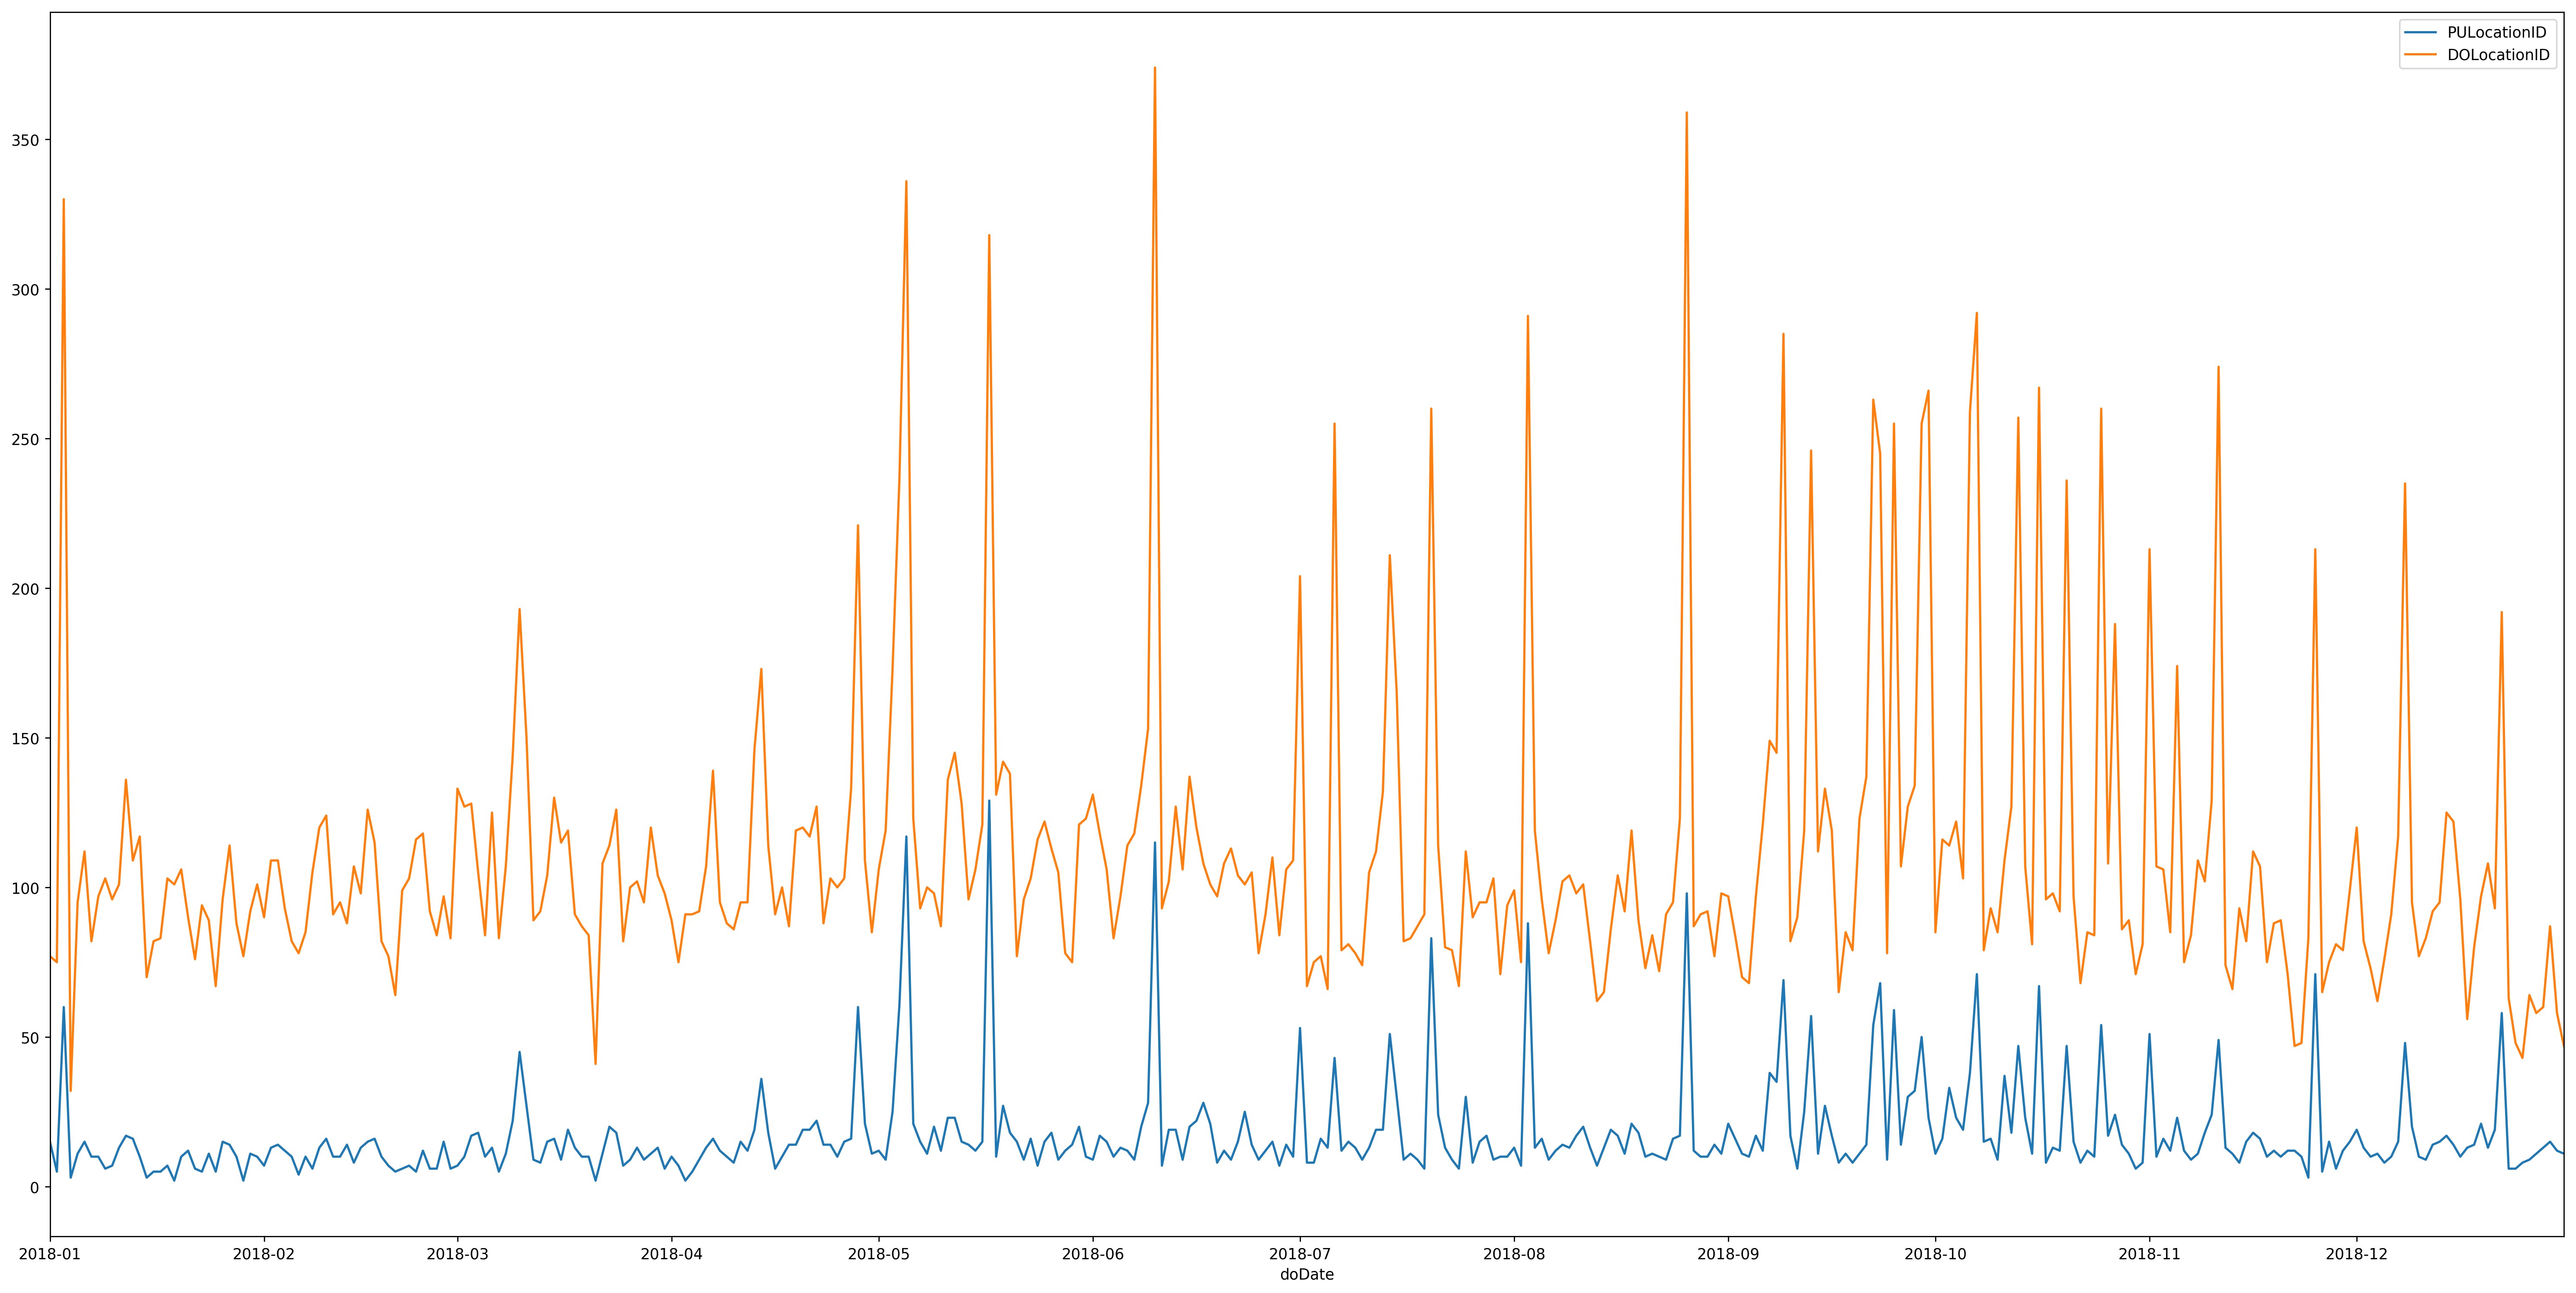

In [55]:
yellow_pickup_date = yellow_total[yellow_total['PULocationID'].isin(taxi_zone_list)].groupby('puDate').count()[['PULocationID']]
yellow_dropoff_date = yellow_total[yellow_total['DOLocationID'].isin(taxi_zone_list)].groupby('doDate').count()[['DOLocationID']]
f, ax = plt.subplots(figsize=(30, 15),dpi=250)
yellow_pickup_date.plot(ax=ax)
yellow_dropoff_date.plot(ax=ax)

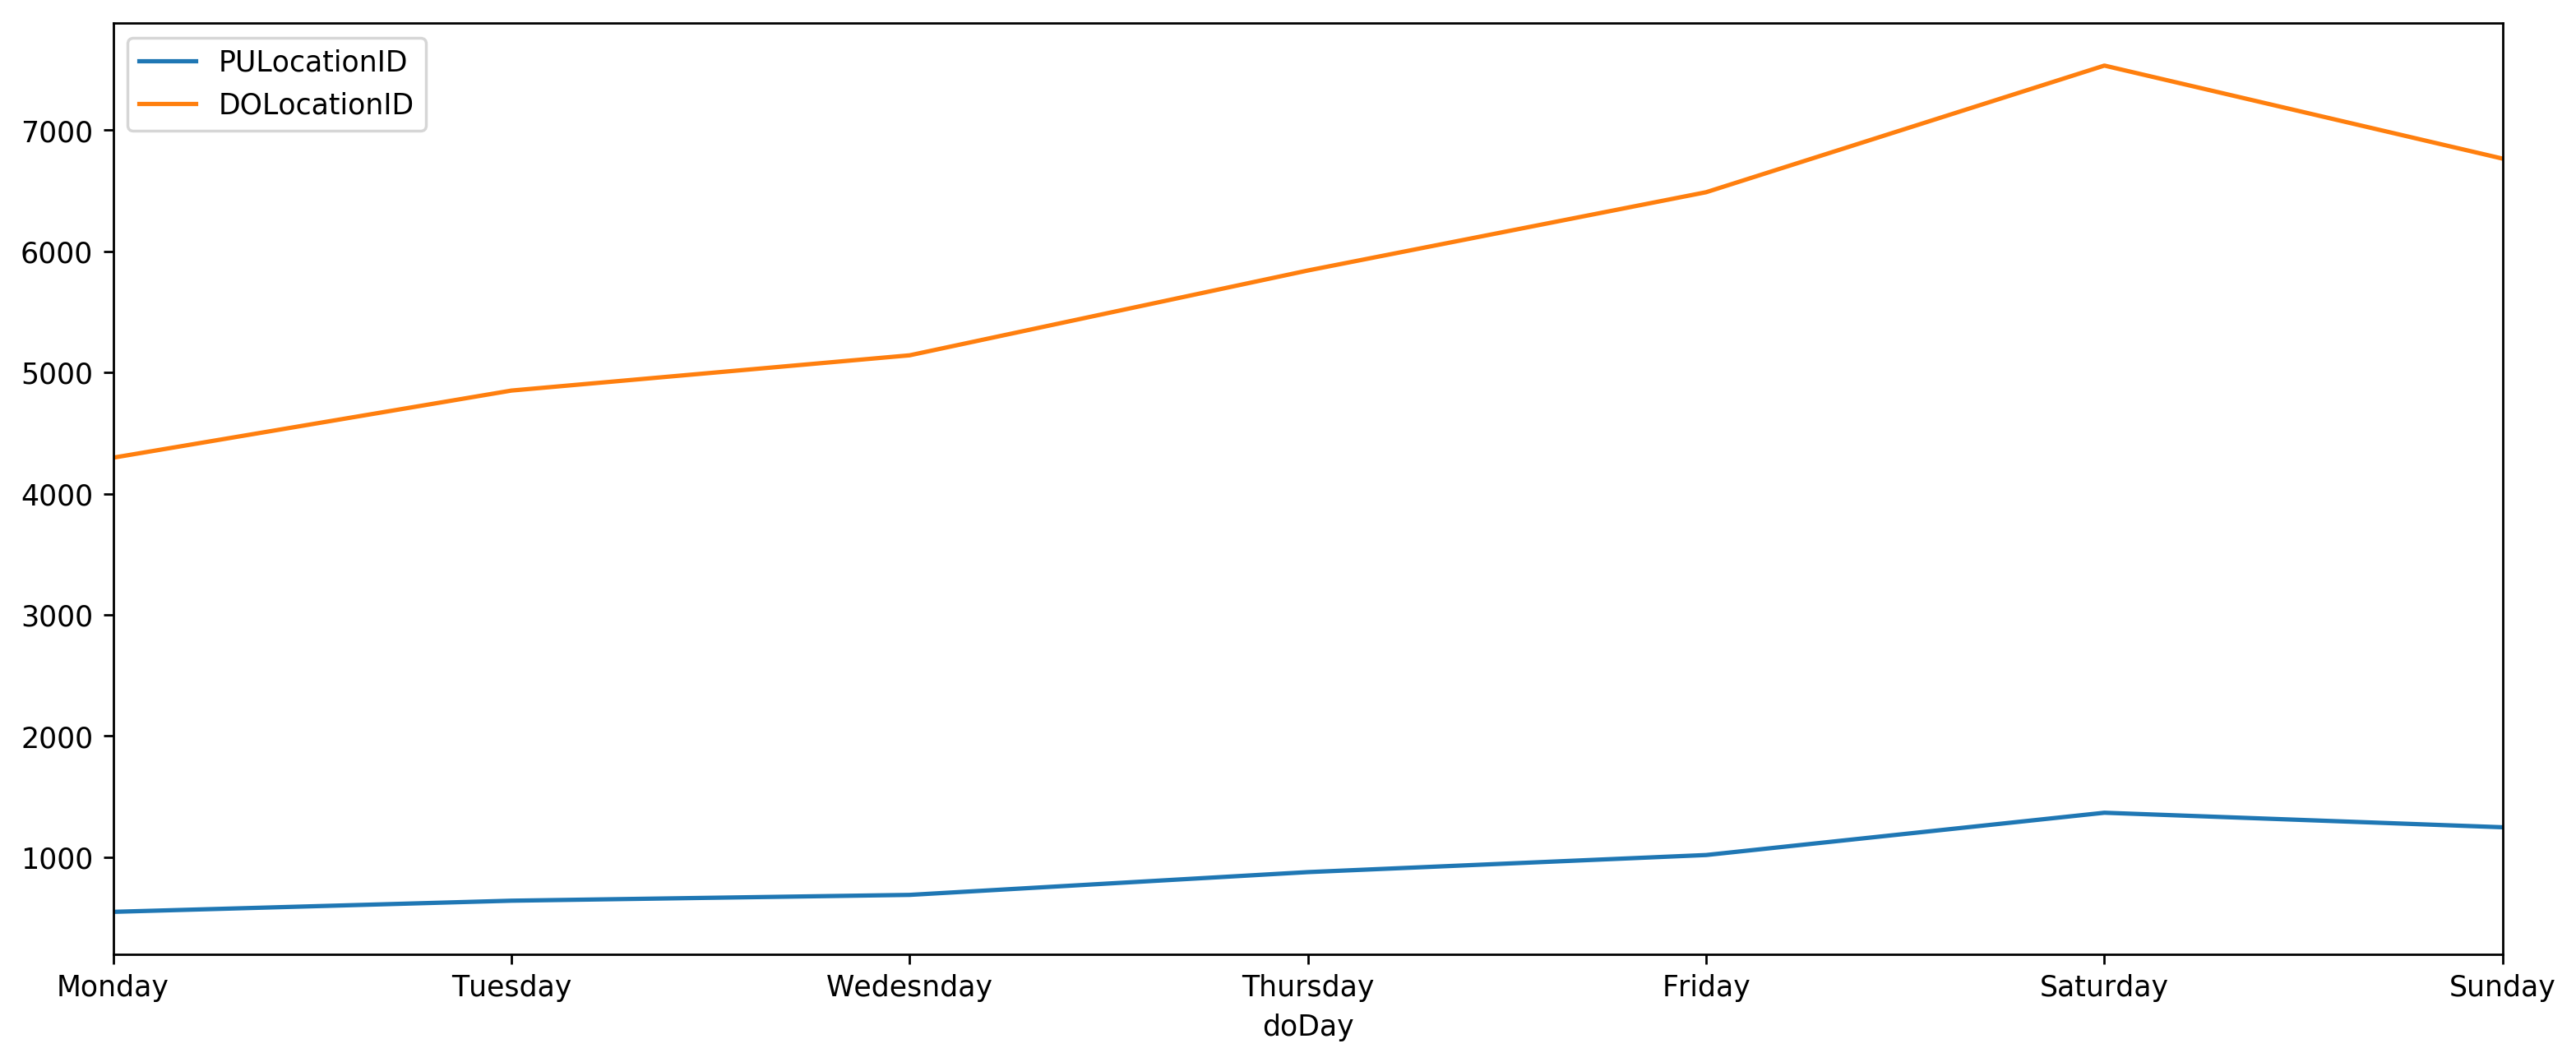

In [56]:
label = ['Monday','Tuesday','Wedesnday','Thursday','Friday','Saturday','Sunday']
yellow_pickup_day = yellow_total[yellow_total['PULocationID'].isin(taxi_zone_list)].groupby('puDay').count()[['PULocationID']]
yellow_dropoff_day = yellow_total[yellow_total['DOLocationID'].isin(taxi_zone_list)].groupby('doDay').count()[['DOLocationID']]
f, ax = plt.subplots(figsize=(15, 6),dpi=250)
yellow_pickup_day.plot(ax=ax)
yellow_dropoff_day.plot(ax=ax)
plt.xticks(np.arange(7), ('Monday','Tuesday','Wedesnday','Thursday','Friday','Saturday','Sunday'))
plt.show()

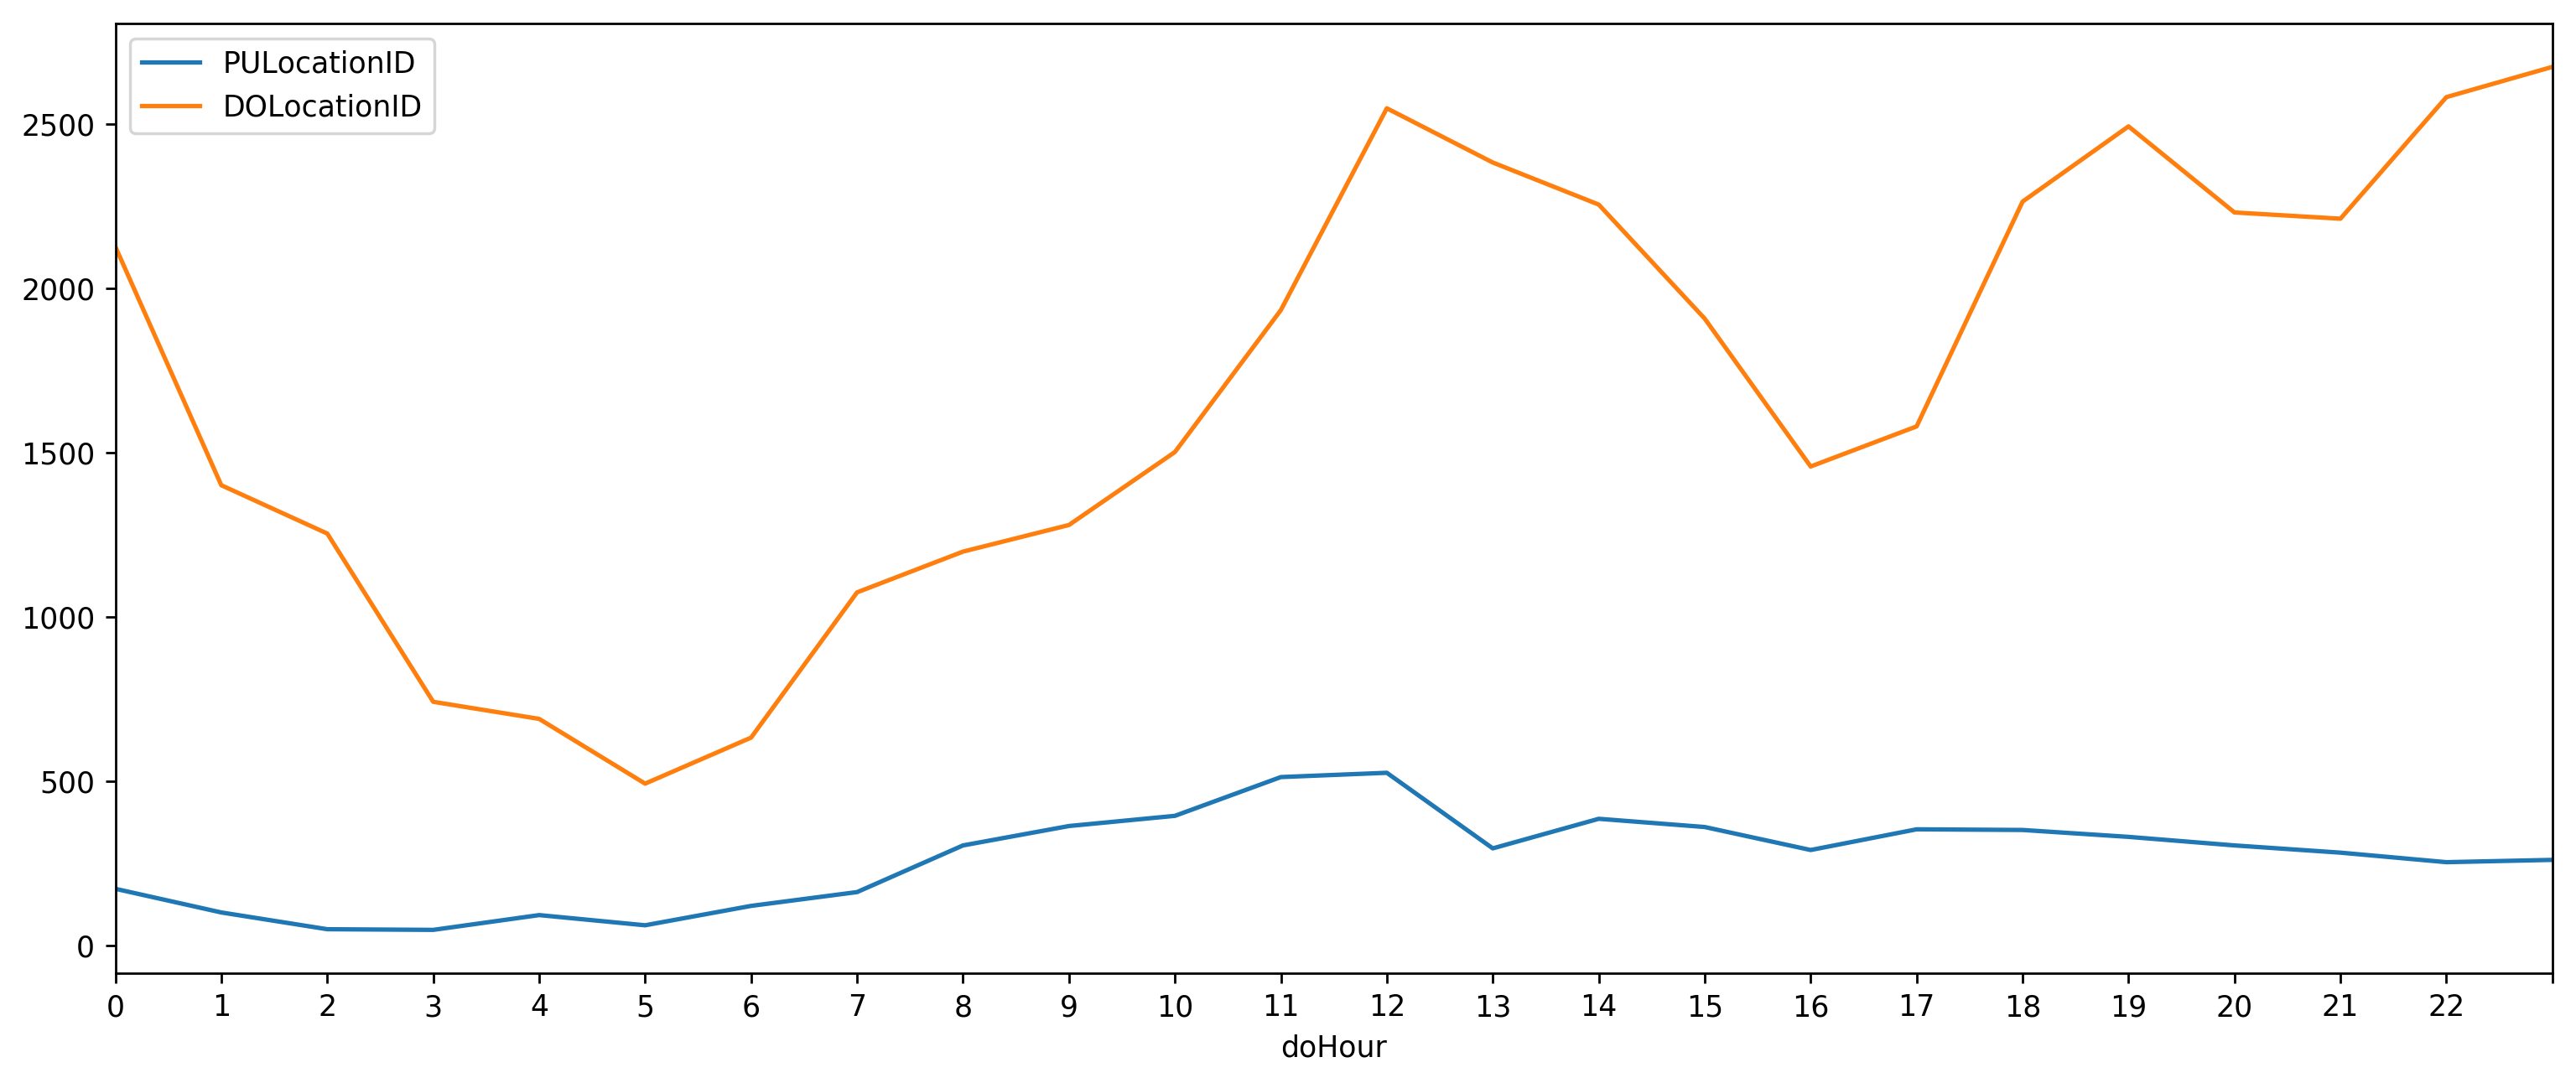

In [57]:
yellow_pickup_hour = yellow_total[yellow_total['PULocationID'].isin(taxi_zone_list)].groupby('puHour').count()[['PULocationID']]
yellow_dropoff_hour = yellow_total[yellow_total['DOLocationID'].isin(taxi_zone_list)].groupby('doHour').count()[['DOLocationID']]
f, ax = plt.subplots(figsize=(15, 6),dpi=250)
yellow_pickup_hour.plot(ax=ax)
yellow_dropoff_hour.plot(ax=ax)
plt.xticks(np.arange(24), (range(0,23)))
plt.show()